In [1]:
import pandas as pd
import talib
import yfinance as yf

In [2]:
# Load stock price data
df = pd.read_csv(r'C:\Users\Admin.DESKTOP-M4R2VLU\Documents\week0ne\data\AMZN_historical_data.csv') 
# Convert 'Date' to datetime format and set it as the index
# Convert 'Date' to datetime and set as index
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
# Convert relevant columns to numeric and fill null values
numeric_columns = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Dividends', 'Stock Splits']
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Count null values
null_counts = df.isnull().sum()
print("Null values in each column:")
print(null_counts)

# Remove rows with any null values
df_cleaned = df.dropna()
# Display shape before and after cleaning
print(f"Original DataFrame shape: {df.shape}")
print(f"Cleaned DataFrame shape: {df_cleaned.shape}")

# If you need to continue with calculations
df_cleaned['SMA'] = talib.SMA(df_cleaned['Close'], timeperiod=14)
df_cleaned['RSI'] = talib.RSI(df_cleaned['Close'], timeperiod=14)
df_cleaned['MACD'], df_cleaned['MACD_Signal'], df_cleaned['MACD_Hist'] = talib.MACD(df_cleaned['Close'], fastperiod=12, slowperiod=26, signalperiod=9)

# Final DataFrame structure
print("Final cleaned DataFrame structure:")
print(df_cleaned.info())
print(df.dtypes)


Null values in each column:
Open            0
High            0
Low             0
Close           0
Adj Close       0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64
Original DataFrame shape: (6846, 8)
Cleaned DataFrame shape: (6846, 8)
Final cleaned DataFrame structure:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6846 entries, 1997-05-15 to 2024-07-30
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          6846 non-null   float64
 1   High          6846 non-null   float64
 2   Low           6846 non-null   float64
 3   Close         6846 non-null   float64
 4   Adj Close     6846 non-null   float64
 5   Volume        6846 non-null   int64  
 6   Dividends     6846 non-null   float64
 7   Stock Splits  6846 non-null   float64
 8   SMA           6833 non-null   float64
 9   RSI           6832 non-null   float64
 10  MACD          6813 non-null   float64
 11  MACD_Signal   6813 n

In [3]:
# Calculate a TA-Lib indicator Simple Moving Average
df['SMA'] = talib.SMA(df['Close'], timeperiod=200)  # 200 days
# Calculate a TA-Lib indicator Relative Strength Index
df['RSI'] = talib.RSI(df['Close'], timeperiod=200)  # 200 days

# Calculate MACD
df['MACD'], df['MACD_Signal'], df['MACD_Hist'] = talib.MACD(df['Close'], fastperiod=12,slowperiod=26,signalperiod=9)

# Remove rows with NaN values after calculations
df = df.dropna()
# Display the last few rows of the DataFrame
print(df[['Close', 'SMA', 'RSI', 'MACD', 'MACD_Signal', 'MACD_Hist']])        

                 Close         SMA        RSI      MACD  MACD_Signal  \
Date                                                                   
1998-03-03    0.298958    0.176832  57.425891  0.015805     0.010999   
1998-03-04    0.305990    0.177930  57.647014  0.016253     0.012050   
1998-03-05    0.312500    0.179065  57.850698  0.016938     0.013028   
1998-03-06    0.319792    0.180255  58.077664  0.017863     0.013995   
1998-03-09    0.347917    0.181638  58.934835  0.020628     0.015321   
...                ...         ...        ...       ...          ...   
2024-07-24  180.830002  166.764500  53.223683 -1.342010     0.635114   
2024-07-25  179.850006  167.023950  53.097488 -1.878483     0.132395   
2024-07-26  182.500000  167.295150  53.397779 -2.065994    -0.307283   
2024-07-29  183.199997  167.563750  53.476854 -2.133520    -0.672530   
2024-07-30  181.710007  167.813150  53.283438 -2.280971    -0.994218   

            MACD_Hist  
Date                   
1998-03-03   0.

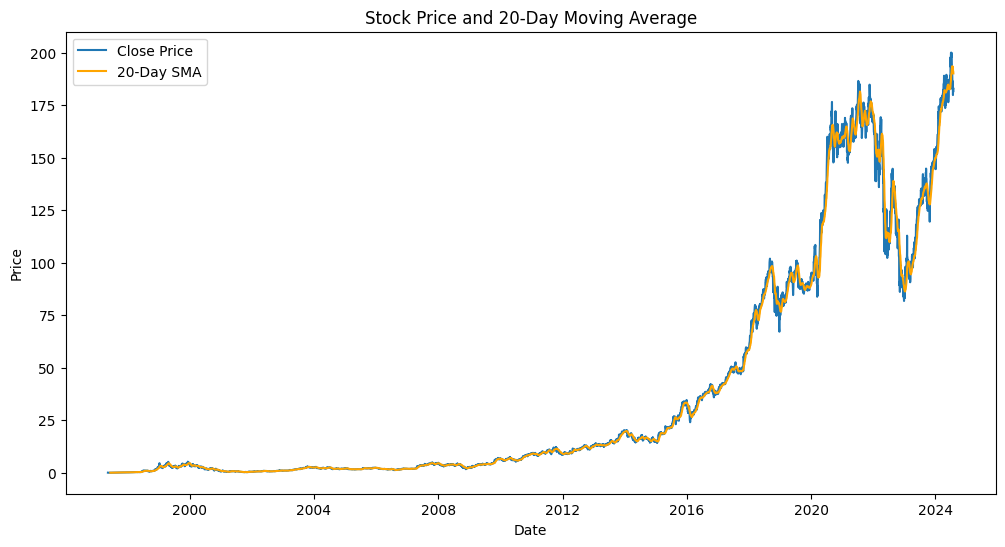

In [4]:
import matplotlib.pyplot as plt
# Load the data into a DataFrame
df = pd.read_csv(r'C:\Users\Admin.DESKTOP-M4R2VLU\Documents\week0ne\data\AMZN_historical_data.csv', parse_dates=['Date'], index_col='Date')

# Ensure the 'Close' column is  correct data type
df['Close'] = pd.to_numeric(df['Close'], errors='coerce')

# Calculate a 20-day moving average
df['SMA_20'] = talib.SMA(df['Close'], timeperiod=20)
# Plot the closing prices and the moving average
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Close'], label='Close Price')
plt.plot(df.index, df['SMA_20'], label='20-Day SMA', color='orange')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Stock Price and 20-Day Moving Average')
plt.legend()
plt.show()